In [58]:
import numpy as np
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

In [183]:
'''  
X <- Serie de tiempo de Ticker 1
Y <- Serie de tiempo de Ticker 2
'''
def distancia_correlacion(X, Y):
    cor = np.corrcoef(X,Y)[0,1]
    metrica = np.sqrt(0.5*(1-cor))
    return metrica

In [184]:
def distancia_correlacion(df):
    cor = df.corr()
    metrica = np.sqrt(0.5*(1-cor))
    return metrica

In [17]:
'''  
X <- Serie de tiempo de Ticker 1
Y <- Serie de tiempo de Ticker 2
bins <- Tamaño partición
norm <- boolean False si las series no están normalizadas
'''
#---------------------------------------------------
def varInfo(X,Y,bins,norm=False):
    # variation of information
    cXY=np.histogram2d(X,Y,bins)[0]
    iXY=mutual_info_score(None,None,contingency=cXY)
    hX=entropy(np.histogram(X,bins)[0]) # marginal
    hY=entropy(np.histogram(Y,bins)[0]) # marginal
    vXY=hX+hY-2*iXY # variation of information
    if norm:
        hXY=hX+hY-iXY # joint
        vXY/=hXY # normalized variation of information
    return vXY

# Leemos Tickers

In [5]:
import yfinance as yf
import datetime
import seaborn as sns

In [29]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 1, 1)
tickers =  ['ATVI', 'ADBE', 'AMD', 'ALGN', 'GOOG', 'GOOGL', 'AMZN', 'AMGN', 'ADI', 'AAPL', 'AMAT', 'ASML', 'ADSK',
    'ADP','BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 
    'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM' ,'DOCU' ,'DLTR' ,'EBAY', 'EA' ,'EXC','EXPE','FB', 
    'FAST', 'FISV', 'FOX', 'FOXA', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG',
    'JD', 'KLAC', 'LRCX', 'LBTYA', 'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT','MRNA', 'MDLZ', 'MNST', 'NTES', 
    'NFLX' ,'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST',
    'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO','TSLA', 'TXN', 'KHC', 'TCOM', 
    'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDC', 'WDAY', 'XEL', 'ZM']
data = yf.download(tickers, start, end)['Adj Close'].dropna()

[*********************100%***********************]  98 of 98 completed


In [157]:
d_cor = distancia_correlacion(data)

In [158]:
d_cor

,ADBE,ALGN,AMD,ATVI,GOOG
ADBE,0.000000,0.278669,0.131872,0.446887,0.177165
ALGN,0.278669,0.000000,0.304735,0.408104,0.197882
AMD,0.131872,0.304735,0.000000,0.481478,0.209329
ATVI,0.446887,0.408104,0.481478,0.000000,0.465009
GOOG,0.177165,0.197882,0.209329,0.465009,0.000000


<AxesSubplot:>

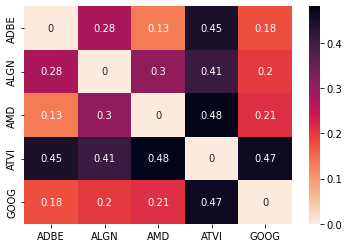

In [160]:
sns.heatmap(d_cor, cmap = sns.cm.rocket_r, annot=True)

<AxesSubplot:>

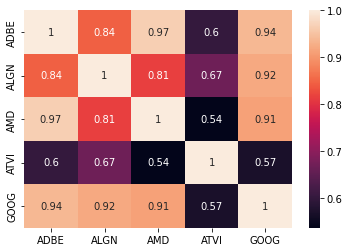

In [167]:
sns.heatmap(data.corr(), cmap = sns.cm.rocket, annot=True)

In [30]:
varinfo_matrix = np.zeros([data.shape[1], data.shape[1]])
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        varinfo_matrix[i,j] = varInfo(data.iloc[:,i], data.iloc[:,j], bins = 100)

<AxesSubplot:>

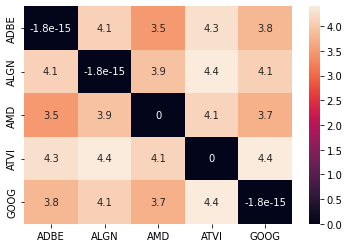

In [169]:
sns.heatmap(varinfo_matrix, cmap = sns.cm.rocket, xticklabels=sorted(tickers), yticklabels=sorted(tickers), annot=True)

# Rankeamos

In [212]:
d_corr = distancia_correlacion(data)


for i in range(d_corr.shape[0]):

  d_corr.iloc[i][i] = 1.0

corr = d_corr[(d_corr < .2)].notna()

correlatedColumns = list(corr.sum()[corr.sum() > 0].index)

df_d_corr = data[correlatedColumns]

In [193]:
corr = data.corr()

#Se aplica correlacion

for i in range(corr.shape[0]):

  corr.iloc[i][i] = 0

corr = corr[(corr > .9)].notna()

correlatedColumns = list(corr.sum()[corr.sum() > 0].index)

data_corr = data[correlatedColumns]

In [31]:
varinfo_matrix = np.zeros([data.shape[1], data.shape[1]])
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        varinfo_matrix[i,j] = varInfo(data.iloc[:,i], data.iloc[:,j], bins = 50)

varinfo_matrix = pd.DataFrame(varinfo_matrix, columns=sorted(tickers))

for i in range(varinfo_matrix.shape[0]):

  varinfo_matrix.iloc[i][i] = 100.0

varinfo_matrix = varinfo_matrix[(varinfo_matrix < 3.0)].notna()

correlatedColumns = list(varinfo_matrix.sum()[varinfo_matrix.sum() > 0].index)

data_varinfo = data[correlatedColumns]



In [32]:
data_varinfo

,AAPL,ADBE,ADP,AMAT,AMD,ASML,AVGO,CDNS,COST,DOCU,...,KLAC,LRCX,MRNA,MSFT,NVDA,PAYX,PYPL,QCOM,SNPS,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-18,49.551826,270.570007,151.803238,42.320339,27.680000,198.277985,283.240479,63.369999,233.323792,52.790001,...,117.817673,185.812119,22.510000,119.282494,46.306980,74.373199,107.360001,73.918320,115.980003,54.652000
2019-04-22,49.714691,272.209991,151.307953,42.166275,28.180000,197.892807,280.022522,64.209999,231.055176,54.130001,...,116.745743,186.241425,23.629999,119.659569,46.846355,74.391426,106.809998,75.842842,116.989998,52.549999
2019-04-23,50.431736,278.489990,154.233002,42.204800,27.969999,197.680939,280.591400,66.699997,233.105499,55.240002,...,116.831123,185.821655,24.700001,121.283920,47.393188,76.187164,106.900002,80.237793,119.889999,52.779999
2019-04-24,50.353962,275.450012,152.793839,42.811432,28.459999,197.796524,279.426849,67.650002,235.364578,55.840000,...,119.183670,186.451340,25.760000,120.868164,47.517471,76.096031,107.220001,80.339554,119.870003,51.731998
2019-04-25,49.896980,277.660004,153.130264,42.801804,27.660000,198.566864,277.195587,67.489998,233.124466,57.009998,...,118.965500,195.647949,25.740000,124.870987,46.458603,75.868126,110.220001,78.711113,119.699997,49.526001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,179.836319,577.679993,243.909973,162.030945,154.360001,805.476624,664.244202,191.649994,561.703369,156.520004,...,437.523560,718.667114,246.880005,340.949280,309.331909,133.951111,192.009995,184.584259,375.589996,1093.939941
2021-12-28,178.799164,569.359985,243.692108,158.963989,153.149994,798.865540,659.042725,190.080002,562.869751,152.389999,...,429.551758,711.414795,241.440002,339.754517,303.104248,134.158508,190.100006,183.088409,372.149994,1088.469971
2021-12-29,178.888916,569.289978,245.613358,160.298309,148.259995,796.095947,662.598999,189.929993,565.989929,152.479996,...,432.464142,721.995178,247.880005,340.451477,299.895508,135.669464,189.970001,184.455460,373.440002,1086.189941


# Clases

In [79]:
class paresTrading:

  def __init__(self, ticker, start, end, minCorrelation = .98):

    self.start = start

    self.end = end

    self.minCorrlation = minCorrelation

    #descargar los datos y guardarlos en un dataframe que se llame self.df

    self.df = yf.download(tickers, start, end)['Adj Close'].dropna()



  def correlationTest(self):

    corr = self.df.corr()

    #Se aplica correlacion

    for i in range(corr.shape[0]):

      corr.iloc[i][i] = 0

    corr = corr[(corr > .8)].notna()

    correlatedColumns = list(corr.sum()[corr.sum() > 0].index)

    data = self.df[correlatedColumns]

    #Se aplica cointegracion

    self.pairs = []

    for i in range(data.shape[1]):

        for j in range(i+1, data.shape[1]):

            resultado = coint(data[data.columns[i]], data[data.columns[j]])

            if resultado[1] <= 0.001:

                self.pairs.append((data.columns[i], data.columns[j]))

    #Se aplica correlacion en serie de tiempo

    return self.pairs

    

  def variationalInformationTest(self):
    varinfo_matrix = np.zeros([self.df.shape[1], self.df.shape[1]])
    for i in range(self.df.shape[1]):
      for j in range(self.df.shape[1]):
        varinfo_matrix[i,j] = varInfo(self.df.iloc[:,i], self.df.iloc[:,j], bins = 50)

    varinfo_matrix = pd.DataFrame(varinfo_matrix, columns=sorted(tickers))


    for i in range(varinfo_matrix.shape[0]):

      varinfo_matrix.iloc[i][i] = 100.0

    varinfo_matrix = varinfo_matrix[(varinfo_matrix < 3.0)].notna()

    correlatedColumns = list(varinfo_matrix.sum()[varinfo_matrix.sum() > 0].index)

    data = self.df[correlatedColumns]

    #Se aplica cointegracion

    self.pairs_varinfo = []

    for i in range(data.shape[1]):

      for j in range(i+1, data.shape[1]):

        resultado = coint(data[data.columns[i]], data[data.columns[j]])

        if resultado[1] <= 0.1:

          self.pairs_varinfo.append((data.columns[i], data.columns[j]))

    return self.pairs_varinfo





In [80]:
modelo = paresTrading(tickers, start, end)

[*********************100%***********************]  98 of 98 completed


In [81]:
cor = modelo.correlationTest()
cor

[('COST', 'PEP'), ('CPRT', 'ISRG'), ('FOXA', 'MAR')]

In [82]:
var_info = modelo.variationalInformationTest()
var_info


[('AAPL', 'AMD'),
 ('ADP', 'PAYX'),
 ('AMD', 'SNPS'),
 ('ASML', 'GOOG'),
 ('ASML', 'GOOGL'),
 ('ASML', 'IDXX'),
 ('AVGO', 'KLAC'),
 ('CDNS', 'SNPS'),
 ('CDNS', 'TSLA'),
 ('COST', 'NVDA'),
 ('IDXX', 'MRNA'),
 ('KLAC', 'SNPS'),
 ('KLAC', 'TSLA'),
 ('MSFT', 'NVDA'),
 ('NVDA', 'SNPS'),
 ('QCOM', 'TSLA')]

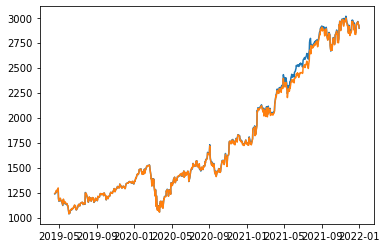

In [107]:
plt.plot(modelo.df['GOOG'])
plt.plot(modelo.df['GOOGL'])